In [62]:
"""Mathematical Foundations of Probability and Statistics."""

'Mathematical Foundations of Probability and Statistics.'

## Mathematical Foundations of Probability and Statistics (summary of book "Essential Math for Data Science")

In [ ]:
import math
from collections import defaultdict
from math import sqrt
from typing import Callable

import numpy as np
from scipy.stats import beta, binom, norm
from sympy import diff, integrate, limit, log, oo, symbols
from sympy.plotting import plot, plot3d

### Chapter 1

#### Key terms, concepts and samples

*Functions* are expressions that define relationships between two or more
variables. More specifically, a function takes input variables (also called
domain variables or independent variables), plugs them into an
expression, and then results in an output variable (also called dependent
variable).

Let's take a look on some examples:

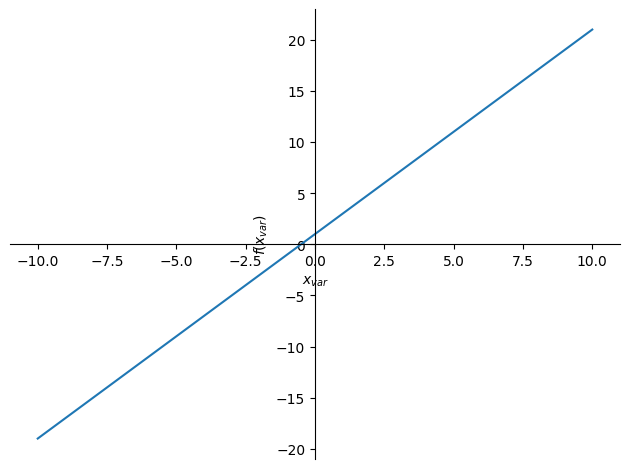

In [64]:
def func_example_1() -> None:
    """Demo example 1."""
    x_var = symbols("x_var")
    f_var = 2 * x_var + 1
    plot(f_var)


func_example_1()

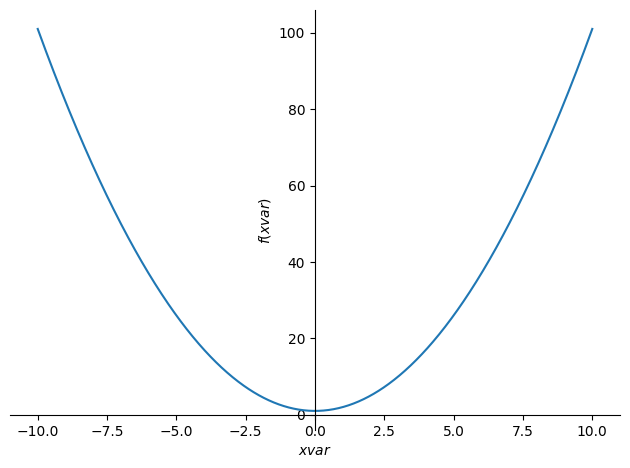

In [65]:
def func_example_2() -> None:
    """Demo example 2."""
    x_var = symbols("xvar")
    f_var = x_var**2 + 1
    plot(f_var)


func_example_2()

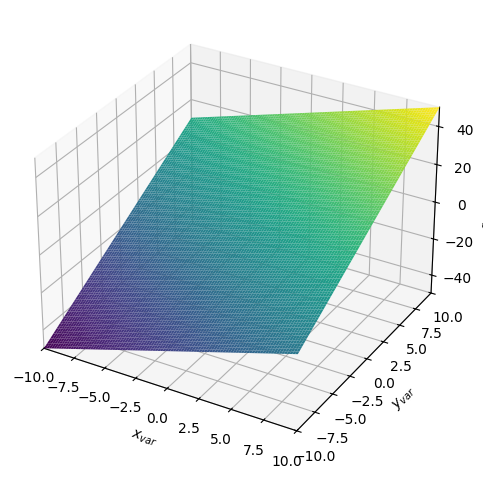

In [66]:
def func_example_3() -> None:
    """Demo example 3."""
    x_var, y_var = symbols("x_var y_var")
    f_var = 2 * x_var + 3 * y_var
    plot3d(f_var)


func_example_3()

#### Elements of Calculus

In [67]:
def example_summation() -> None:
    """Demonstrate summation of a simple sequence."""
    summation = sum(2 * ind for ind in range(1, 6))
    print(summation)


example_summation()

30


In [68]:
def example_exponentiation() -> None:
    """Demonstrate exponentiation (power function)."""
    print(5**2)


example_exponentiation()

25


In [69]:
def example_logarithm() -> None:
    """Compute a logarithm with a given base."""
    x_var = log(8, 2)
    print(x_var)


example_logarithm()

3


In [70]:
def example_limit() -> None:
    """Evaluate a limit expression."""
    n_var = symbols("n")
    f_var = (1 + (1 / n_var)) ** n_var
    result = limit(f_var, n_var, oo)
    print(result)
    print(result.evalf())


example_limit()

E
2.71828182845905


In [71]:
def example_derivative() -> None:
    """Differentiate a simple function."""
    x_var = symbols("x_var")
    f_var = x_var**2
    dx_f = diff(f_var)
    print(dx_f)


example_derivative()

2*x_var


6*x_var**2
9*y_var**2


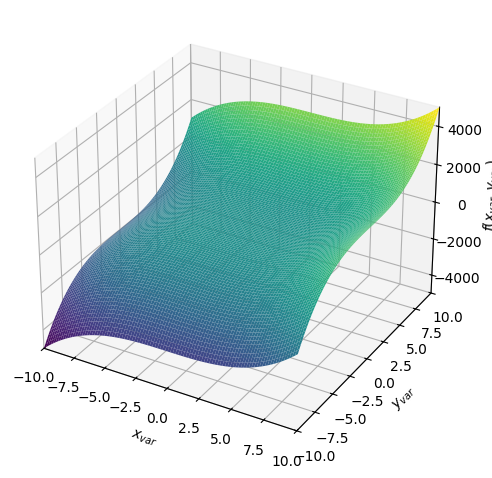

In [72]:
def example_partial_derivatives() -> None:
    """Compute partial derivatives of a multivariable function."""
    x_var, y_var = symbols("x_var y_var")
    f_var = 2 * x_var**3 + 3 * y_var**3
    dx_f = diff(f_var, x_var)
    dy_f = diff(f_var, y_var)
    print(dx_f)
    print(dy_f)
    plot3d(f_var)


example_partial_derivatives()

In [73]:
def example_chain_rule() -> None:
    """Apply the chain rule in differentiation."""
    x_var, y_var = symbols("x_var y_var")
    _y_var = x_var**2 + 1
    dy_dx = diff(_y_var)
    z_var = y_var**3 - 2
    dz_dy = diff(z_var)
    dz_dx_chain = (dy_dx * dz_dy).subs(y_var, _y_var)
    dz_dx_no_chain = diff(z_var.subs(y_var, _y_var))
    print(dz_dx_chain)
    print(dz_dx_no_chain)


example_chain_rule()

6*x_var*(x_var**2 + 1)**2
6*x_var*(x_var**2 + 1)**2


In [74]:
# fmt: off
def example_approximate_integral(
    a_var: float,
    b_var: float,
    n_var: int,
    f_var: Callable[[float], float],
) -> float:
    """Approximate an integral using the midpoint rule."""
    delta_x: float = (b_var - a_var) / n_var
    total_sum: float = 0.0

    for i_var in range(1, n_var + 1):
        midpoint: float = 0.5 * (2 * a_var + delta_x * (2 * i_var - 1))
        total_sum += f_var(midpoint)

    return total_sum * delta_x


def test_function_for_integral(x_var: float) -> float:
    """Sample function to integrate (x_var^2 + 1)."""
    return x_var**2 + 1


area_var: float = example_approximate_integral(
    a_var=0.0, b_var=1.0, n_var=5, f_var=test_function_for_integral
)
print(area_var)
# fmt: on

1.33


In [75]:
def example_definite_integral() -> None:
    """Evaluate a definite integral symbolically."""
    x_var = symbols("x_var")
    f_var = x_var**2 + 1
    area = integrate(f_var, (x_var, 0, 1))
    print(area)


example_definite_integral()

4/3


#### Tasks

1. 62.6738 is rational because it’s a terminating decimal.
2. 100
3. 9
4. 125
5. Using compound interest (monthly compounding):

$$
A = 1000 \cdot \left(1 + \frac{0.05}{12}\right)^{12 \cdot 3} \approx 1161.60
$$

6. Using continuous compounding:

$$
A = 1000 \cdot e^{0.05 \cdot 3} \approx 1161.83
$$

7. 18
8. 10

### Chapter 2 

#### Key terms, concepts and samples

*Probability* is the level of confidence that an event will happen, often expressed as a percentage.
Likelihood is similar to probability and often confused with it. In everyday language, they can be used as synonyms.
The distinction is the following: probability is about quantifying predictions of future events, 
whereas likelihood is measuring the frequency of events, that alady occured. 
In statistics and machine learning, likelihood (based on past data) is used 
to predict probabilities (about the future).


*The probability of two independent events happening simultaneously* (joint probability) 
can be calculated by multiplying the probability of each event. 

For *mutually exclusive events* (that cannot occur simultaneously), the probability
of event A or B happening is calculated by summing up their individual probabilities.

*Conditional probability* is the chance of an event happening given that another event 
has already occured. Bayes' formula allows us to flip conditional 
probabilities in order to update our beliefs based on new data.

In [76]:
def example_bayes_theorem() -> None:
    """Demonstrate Bayes' theorem with conditional probability."""
    p_coffee_drinker = 0.65
    p_cancer = 0.005
    p_coffee_drinker_given_cancer = 0.85
    p_cancer_given_coffee_drinker = (
        p_coffee_drinker_given_cancer * p_cancer / p_coffee_drinker
    )
    print(p_cancer_given_coffee_drinker)


example_bayes_theorem()

0.006538461538461539


*Binomial distribution* describes the likelihood of getting exactly k successes in n trials, with a success probability of p in each trial.

In [77]:
def example_binomial_distribution() -> None:
    """Compute probabilities for a binomial distribution."""
    n_trials = 10
    success_prob = 0.9
    for k_successes in range(n_trials + 1):
        probability = binom.pmf(k_successes, n_trials, success_prob)
        print(f"{k_successes} - {probability}")


example_binomial_distribution()

0 - 9.999999999999977e-11
1 - 8.999999999999976e-09
2 - 3.6449999999999933e-07
3 - 8.747999999999988e-06
4 - 0.00013778099999999974
5 - 0.0014880347999999982
6 - 0.011160260999999989
7 - 0.05739562799999997
8 - 0.1937102444999998
9 - 0.38742048899999976
10 - 0.34867844010000015


*The Beta distribution models* the likelihood of a probability value given 
𝑎 a successes and 𝑏 b failures. It allows to estimate the true probability of
success based on observed outcomes. The Beta distribution is a type of probability distribution,
meaning the area under its curve equals 1 (or 100%).
To find the probability of a certain range, we need to calculate the area
under the curve for that interval.

In [78]:
def example_beta_distribution() -> None:
    """Evaluate cumulative probability for a Beta distribution."""
    alpha_param = 8
    beta_param = 2
    probability = beta.cdf(0.90, alpha_param, beta_param)
    print(probability)


example_beta_distribution()

0.7748409780000002


#### Tasks

1. 12%
2. 82%
3. 6%

In [79]:
# 4


def example_binomial_tail_probability() -> None:
    """Compute probability of 50 or more no-shows using the binomial distribution."""
    n_trials = 137
    success_prob = 0.40
    probability_sum = 0.0
    for x_successes in range(50, n_trials + 1):
        probability_sum += binom.pmf(x_successes, n_trials, success_prob)

    print(probability_sum)


example_binomial_tail_probability()

0.8220955881474251


In [80]:
# 5


def example_beta_coin_bias() -> None:
    """Evaluate posterior probability that a coin is biased (p > 0.5)."""
    heads_count = 8
    tails_count = 2
    probability = 1 - beta.cdf(0.5, heads_count, tails_count)
    print(probability)


example_beta_coin_bias()

0.98046875


### Chapter 3

#### Key terms, concepts and samples

Descriptive statistics allows to summarize data (like averages and graphs).
Inferential statistics uses samples to make conclusions about a bigger group (population).
A population (or universe) is the entire group you want to study, like
all people over 65 in North America or all golden retrievers in Scotland.
Populations can be broad or narrow. A sample is a subst of the population, ideally 
random and unbiased, used to make conclusions about the whole population. Working with 
samples is often more practical, especially for large populations.

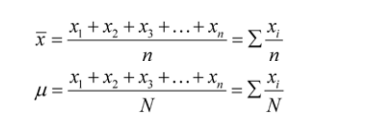

In [81]:
def example_mean() -> None:
    """Compute the arithmetic mean of a sample."""
    sample = [1, 3, 2, 5, 7, 0, 2, 3]
    mean_value = sum(sample) / len(sample)
    print(mean_value)


example_mean()

2.875


The arithmetic mean is a type of average where the sum of all values is divided
by the number of values. It’s a specific case of
the weighted mean, where all values have equal weight.

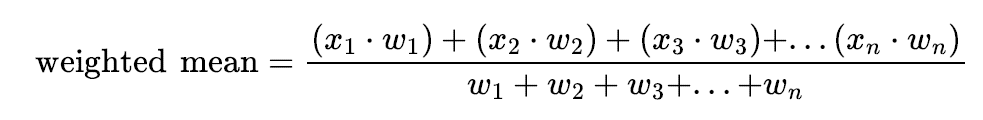

In [82]:
def example_weighted_mean() -> None:
    """Compute the weighted mean of a sample with given weights."""
    sample = [90, 80, 63, 87]
    weights = [0.2, 0.2, 0.2, 0.4]
    weighted_mean_value = sum(s * w for s, w in zip(sample, weights)) / sum(weights)
    print(weighted_mean_value)


example_weighted_mean()

81.4


The median is the central value in an ordered set of numbers.
When the numbers are arranged in ascending order,
the median is the middle value of the sequence.

In [83]:
def median(values: list[int]) -> float:
    """Return the median of a numeric dataset."""
    ordered: list[int] = sorted(values)
    n_var: int = len(ordered)
    mid: int = int(n_var / 2) - 1 if n_var % 2 == 0 else int(n_var / 2)

    if n_var % 2 == 0:
        return (ordered[mid] + ordered[mid + 1]) / 2.0
    return ordered[mid]


def calc_median_example_1() -> None:
    """Print the median of a sample dataset."""
    sample: list[int] = [0, 1, 5, 7, 9, 10, 14]
    print(median(sample))


calc_median_example_1()

7


The mode is the value that occurs most frequently in a data set.
It’s particularly useful for identifying which values occur most often when there are repeated values.

In [84]:
def mode(values: list[int]) -> list[int]:
    """Mode of a numeric dataset."""
    counts: defaultdict[int, int] = defaultdict(int)

    for s_var in values:
        counts[s_var] += 1

    max_count_var: int = max(counts.values())
    return [v for v in set(values) if counts[v] == max_count_var]


def calc_mode_example_1() -> None:
    """Print the mode(s) of a sample dataset."""
    sample: list[int] = [1, 3, 2, 5, 7, 0, 2, 3]
    print(mode(sample))


calc_mode_example_1()

[2, 3]


Variance is a measure of how far a set of numbers are spread out from their mean.
It’s calculated as the average of the squared differences from the mean.

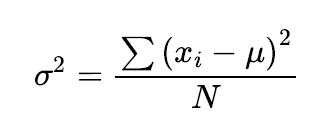

In [85]:
def variance(values: list[int]) -> float:
    """Return the variance of a numeric dataset."""
    mean_1: float = sum(values) / len(values)
    return sum((v_var - mean_1) ** 2 for v_var in values) / len(values)


def calc_variance_example_1() -> None:
    """Print the variance of a sample dataset."""
    data: list[int] = [0, 1, 5, 7, 9, 10, 14]
    print(variance(data))


calc_variance_example_1()

21.387755102040817


Taking the square root is the inverse operation of squaring,
so we take the square root of the variance to get
the standard deviation (also called the root mean square deviation). 

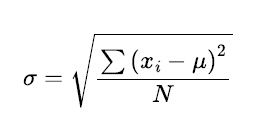

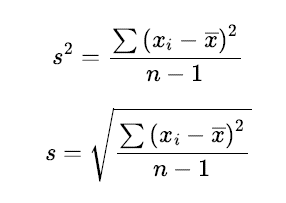

In [86]:
def std_dev(values: list[int]) -> float:
    """Return the standard deviation of a numeric dataset."""
    return sqrt(variance(values))


def calc_std_example_1() -> None:
    """Print the standard deviation of a sample dataset."""
    data_2: list[int] = [0, 1, 5, 7, 9, 10, 14]
    print(std_dev(data_2))


calc_std_example_1()

4.624689730353899


The most well-known probability distribution is the normal distribution 
(also called the Gaussian distribution). It has a bell-shaped, 
symmetric curve centered around the mean, with the spread determined by the standard deviation. 
The further from the mean, the thinner the tails of the curve become.
The probability density function (PDF) that defines the normal distribution is as follows:

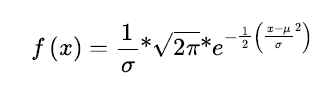

In [87]:
def normal_pdf(x_var: float, mean_1: float, std_dev_init: float) -> float:
    """Return the probability density for a normal distribution at x."""
    return (1.0 / (math.sqrt(2.0 * math.pi) * std_dev_init)) * math.exp(
        -((x_var - mean_1) ** 2) / (2.0 * std_dev_init**2)
    )


def calc_normal_cdf_value_example_1() -> None:
    """Print an example of a CDF value for a normal distribution."""
    mean_2: float = 64.43
    std_dev_sec: float = 2.99
    x_var: float = norm.cdf(64.43, mean_2, std_dev_sec)
    print(x_var)


calc_normal_cdf_value_example_1()


def calc_normal_ppf_value_example_1() -> None:
    """Print an example of a quantile (PPF) value for a normal distribution."""
    x_var: float = norm.ppf(0.95, loc=64.43, scale=2.99)
    print(x_var)


calc_normal_ppf_value_example_1()

0.5
69.3481123445849


Z-scores

The normal distribution is often rescaled so that the mean is 0 
and the standard deviation is 1. This results in the standard normal distribution.

This transformation makes it easy to compare 
variability across different normal distributions, 
even if they have different means and variances.

An important feature of the standard normal 
distribution is that it expresses all values of 𝑥
x in terms of standard deviations from the mean. 
These transformed values are called Z-scores, or standardized scores.

To convert a value 𝑥 to a Z-score, we use the simple scaling formula:

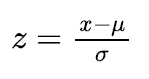

In [ ]:
def z_score(x_var: float, mean_3: float, std_var_: float) -> float:
    """Return the z-score for a given observation x."""
    return (x_var - mean_3) / std_var_


def z_to_x(z_var: float, mean_4: float, std_var: float) -> float:
    """Convert a z-score back to the original x value."""
    return (z_var * std_var) + mean_4


def calc_to_z_scored_values_example_1() -> None:
    """Print an example of z-score calculation and back-conversion."""
    mean_5: float = 140_000
    std_dev_1: float = 3_000
    x_var: float = 150_000
    z_var: float = z_score(x_var, mean_5, std_dev_1)
    back_to_x: float = z_to_x(z_var, mean_5, std_dev_1)
    print(f"Z-score: {z_var}")
    print(f"Back-converted x_var: {back_to_x}")


calc_to_z_scored_values_example_1()

Z-score: 3.3333333333333335
Back-converted x_var: 150000.0


The coefficient of variation (CV) is a useful 
tool for measuring relative spread. It allows you to compare 
variability across different distributions, even if their means differ.

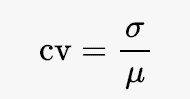

Central Limit Theorem (CLT) states:

If you take a sufficiently large sample from any distribution with a 
finite mean and variance, the distribution of the sample means will tend 
to follow a normal distribution, regardless of the original distribution’s shape.

A confidence interval is a statistical tool that shows 
how confident we are that a sample estimate (like the mean) 
is close to the true population value.

In [89]:
def critical_z_value(p_var: float) -> tuple[float, float]:
    """Return the critical z-values (lower, upper) for a given confidence level p."""
    norm_dist = norm(loc=0.0, scale=1.0)
    left_tail_area: float = (1.0 - p_var) / 2.0
    upper_area: float = 1.0 - ((1.0 - p_var) / 2.0)
    return norm_dist.ppf(left_tail_area), norm_dist.ppf(upper_area)


print(critical_z_value(p_var=0.95))

(np.float64(-1.959963984540054), np.float64(1.959963984540054))


Using the Central Limit Theorem, we can estimate the margin of error (E) — 
the range around the sample mean where the true population mean is 
likely to fall, given a certain confidence level.

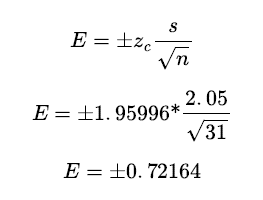

In [90]:
# fmt: off
def confidence_interval(
    p_var: float, 
    sample_mean: float, 
    sample_std: float, 
    n_var: int
) -> tuple[float, float]:
    """Return the confidence interval for a sample mean given confidence level p."""
    lower_var, upper_var = critical_z_value(p_var)
    lower_ci_var: float = lower_var * (sample_std / sqrt(n_var))
    upper_ci_var: float = upper_var * (sample_std / sqrt(n_var))
    return sample_mean + lower_ci_var, sample_mean + upper_ci_var


print(confidence_interval(p_var=0.95, sample_mean=64.408, sample_std=2.05, n_var=31))
# Based on a sample of 31 golden retrievers with an average body weight of 64.
# 408 pounds and a standard deviation of 2.05, I am 95% confident that the
# population mean lies between 63.686 and 65.1296.
# fmt: on

(np.float64(63.68635915701992), np.float64(65.12964084298008))


The p-value helps us test whether an observed effect is statistically significant.

We start by stating a null hypothesis (H₀):

- The variable being studied has no real effect, and any positive results are due to random chance.

Then we define an alternative hypothesis (H₁):

- The observed effect is real and caused by the variable being studied — also called the treatment or independent variable.

If the p-value is small enough (usually less than 0.05), 
we say the result is statistically significant and reject 
the null hypothesis in favor of the alternative.

#### Tasks

In [ ]:
# Task 1
print(np.mean([1.78, 1.75, 1.72, 1.74, 1.77]))
print(np.std([1.78, 1.75, 1.72, 1.74, 1.77]))


# Task 2
mean_6: float = 42
std_dev_2: float = 8
x_var_2: float = norm.cdf(30, mean_6, std_dev_2) - norm.cdf(20, mean_6, std_dev_2)
print(x_var_2)


# Task 3
def critical_z_value_2(
    p_var: float, mean_7: float = 0.0, std: float = 1.0
) -> tuple[float, float]:
    """Return the lower and upper critical z-values."""
    norm_dist = norm(loc=mean_7, scale=std)
    left_area: float = (1.0 - p_var) / 2.0
    right_area: float = 1.0 - ((1.0 - p_var) / 2.0)
    return norm_dist.ppf(left_area), norm_dist.ppf(right_area)


e_var: tuple[float, float] = (
    1.715588 + critical_z_value(0.99)[0] * (0.029252 / np.sqrt(34)),
    1.715588 + critical_z_value(0.99)[1] * (0.029252 / np.sqrt(34)),
)
print(e_var)

# Task 4
mean_pr: float = 10345
std_dev_3: float = 552
p1: float = 1.0 - norm.cdf(11641, mean_pr, std_dev_3)
p2: float = p1
p_value: float = p1 + p2

print("Two-tailed p-value:", p_value)
if p_value <= 0.05:
    print("Two-tailed test passed")
else:
    print("Two-tailed test failed")
# fmt: on

1.752
0.02135415650406264
0.0638274380338035
(np.float64(1.7026658973748656), np.float64(1.7285101026251342))
Two-tailed p-value: 0.01888333596496139
Two-tailed test passed
